In [16]:
import pandas as pd

from scipy import stats
from statsmodels.stats.weightstats import  _zconfint_generic, _tconfint_generic
from statsmodels.stats.weightstats import *

from matplotlib import pyplot as plt
%matplotlib inline

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Распределения

**Квантили нормального распределения**

In [41]:
mu = 0
sigma = 1

norm_rv = stats.norm(loc=mu, scale=sigma)

print(norm_rv.ppf(0.025), norm_rv.ppf(0.975)) # квантили уровня 0.025 и 0.975, соответственно.

print(norm_rv.cdf(-1.9599639845400545), norm_rv.cdf(1.959963984540054)) # вероятности, соответственно.

-1.9599639845400545 1.959963984540054
0.024999999999999977 0.975


**Квантили t-распределения**

In [18]:
ddof = 64

t_rv = stats.t(ddof)

t_rv.ppf(0.025), t_rv.ppf(0.975) # квантили уровня 0.025 и 0.975, соответственно.

(-1.9977296536259739, 1.9977296536259734)

### 2. Данные

In [19]:
df = pd.read_excel('inet_stat.xlsx', header=None).drop([0,1,3], axis=1)
df = pd.concat([df.loc[:64,2].reset_index(drop=True), df.loc[64:,2].reset_index(drop=True)], axis=1)
df.columns = ['p1', 'p2']
df.head()

,p1,p2
0,8,9
1,80,6
2,5,5
3,23,0
4,12,0


### 3. EDA

(array([28., 20.,  7.,  2.,  3.,  4.,  0.,  0.,  0.,  1.]),
 array([  0. ,  15.8,  31.6,  47.4,  63.2,  79. ,  94.8, 110.6, 126.4,
        142.2, 158. ]),
 <a list of 10 Patch objects>)

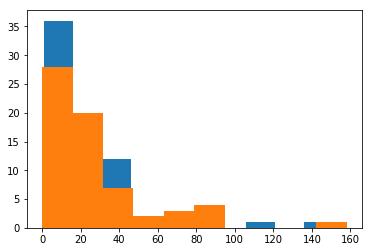

In [20]:
plt.hist(df.p1)
plt.hist(df.p2)

### 4. Статистики

In [21]:
p1_mean = df.p1.mean()
p1_std = df.p1.std(ddof=1)
print(p1_mean, p1_std)

p2_mean = df.p2.mean()
p2_std = df.p2.std(ddof=1)
print(p2_mean, p2_std)

23.107692307692307 26.129558858768476
26.53846153846154 27.51254084678756


In [22]:
# Стандартное отклонение ряда (p2_std)
(((df.p2 - df.p2.mean())**2).sum()/(len(df.p2)-1))**0.5

27.51254084678756

In [23]:
# Стандартная ошибка среднего
p1_mean_std = p1_std/len(df.p1)**0.5
p2_mean_std = p2_std/len(df.p2)**0.5

print(p1_mean_std, p2_mean_std)

3.240972897980449 3.4125107018060516


In [24]:
alpha = 0.05

tcrit = stats.t.ppf(1 - alpha / 2., len(df.p1)-1)
#t_rv.ppf(0.975)
print(tcrit)

lower = p1_mean - tcrit * p1_mean_std
upper = p1_mean + tcrit * p1_mean_std
print(lower, upper)

1.9977296536259734
16.633104642798656 29.582279972585958


**4.1. Расчетный доверительный интервал для среднего**

In [25]:
p1_mean + t_rv.ppf(0.025)*p1_mean_std, p1_mean - t_rv.ppf(0.025)*p1_mean_std

(16.633104642798656, 29.582279972585958)

**4.2. t_conf_int доверительный интервал для среднего**

In [26]:
_tconfint_generic(p1_mean, p1_mean_std, len(df.p1), 0.05, 'two-sided')

(16.63502247513866, 29.580362140245956)

In [27]:
_tconfint_generic(p2_mean, p2_mean_std, len(df.p2), 0.05, 'two-sided')

(19.723207055275253, 33.35371602164783)

### 5. Проверка гипотез

Для того, чтобы использовать критерй Стьюдента для связанных выборок, необходимо проверить, что распределение попарных разностей существенно не отличается от нормального.

<font color='red'>**Критерий Шапиро-Уилка:**</font>

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

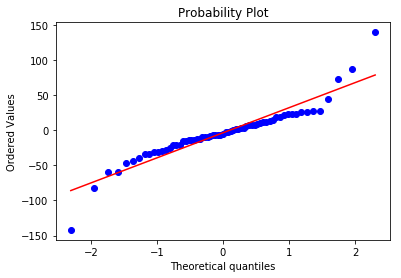

In [28]:
stats.probplot(df.p1 - df.p2, dist = "norm", plot = pylab)
pylab.show()

In [29]:
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(df.p1- df.p2))

Shapiro-Wilk normality test, W-statistic: 0.896712, p-value: 0.000053


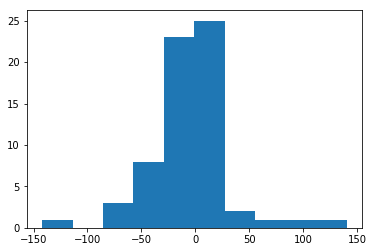

In [30]:
plt.hist(df.p1 - df.p2)
plt.show()

<font color='red'>**Критерий Стьюдента:**</font>

$H_0\colon$ средние значения одинаковы 

$H_1\colon$ не одинаковы.

In [31]:
stats.ttest_rel(df.p1, df.p2)

Ttest_relResult(statistic=-0.7383403963504049, pvalue=0.46300659504775254)

In [32]:
print ("95%% confidence interval: [%f, %f]" % DescrStatsW(df.p1 - df.p2).tconfint_mean(alpha=0.05, alternative='two-sided'))

95% confidence interval: [-12.713411, 5.851873]


In [33]:
dd_mean = (df.p1 - df.p2).mean()
dd_std = (df.p1 - df.p2).std(ddof=1)

S = (((df.p1 - df.p2 - dd_mean)**2).sum()/(len(df)-1))**0.5

T = (p1_mean - p2_mean)/S*len(df)**0.5
T

-0.7383403963504055

In [39]:
# Вероятность получить такое или еще более экстремальное значение статистики (p-value) 
# при соблюдении нулевой гипотезы

ddof = 64
t_rv = stats.t(ddof)

t_rv.cdf(T)*2    # Двусторонняя

0.4630065950477521